In [1]:

%pprint
import sys
import os.path as osp
sys.path.insert(1, osp.abspath('../py'))
from StatsByCountry import nu, ssu

Pretty printing has been turned OFF


In [2]:

countries_list = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Asia & Pacific', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe & Central Asia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Global', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Latin America & Caribbean', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Middle East & North Africa', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Slovak Republic', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Asia', 'Spain', 'Sri Lanka', 'Sub-Saharan Africa', 'Switzerland', 'São Tomé and Principe', 'Tajikistan', 'Tanzania', 'Thailand', 'The Gambia', 'Timor-Leste', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza', 'Zambia', 'Zimbabwe']

In [45]:

from StatsByCountry.notebook_utils import read_csv, walk, re, pd

root_dir = r'C:\Users\daveb\Downloads'
for sub_directory, directories_list, files_list in walk(root_dir):
    for file_name in files_list:
        if file_name.endswith('.csv'):
            csv_name = re.sub(r'^Figure ?\d+_ ', '', file_name.replace('.csv', ''))
            csv_name = re.sub('[^A-Za-z0-9]+', '_', csv_name.strip()) + '_df'
            csv_path = osp.join(sub_directory, file_name)
            try:
                df = read_csv(osp.abspath(csv_path), sep='\t', encoding=nu.encoding_type)
                df.columns = df.columns.str.strip()
                df = df.map(lambda x: str(x).replace('%', '').strip(), na_action='ignore')
                
                # Convert non-country columns to float
                for column in df.columns:
                    df[column] = pd.to_numeric(df[column], errors='ignore')

                # Save according to the cleaned-up file name
                nu.save_data_frames(**{csv_name: df})
                
            except Exception as e:
                print(f'{e.__class__.__name__} error trying to process {file_name}: {str(e).strip()}')

Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\Female_share_of_employment_df.csv
Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\Public_sector_employment_by_occupational_groups_df.csv
Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\Public_sector_employment_df.csv
Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\Tertiary_education_df.csv
Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\Industry_Distribution_df.csv
Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\Aggregate_Wage_premium_df.csv
Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\Female_male_wage_ratio_df.csv
Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\Wage_premium_by_education_df.csv
Saving to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\csv\Wage_Bill_df.csv
Saving to C:\Users\daveb\OneDr

In [24]:

from StatsByCountry.notebook_utils import re

female_share_of_employment_df = nu.load_object('Female_share_of_employment_df')
df = female_share_of_employment_df.copy().T.reset_index(drop=False)
df.columns = df.iloc[0].to_list()
df = df.iloc[1:].reset_index(drop=True).rename(columns={'Employment Type': 'Country'})
df.columns = [
    cn if cn == 'Country' else 'female_share_of_employment_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(female_share_of_employment_df=df)

,Country,female_share_of_employment_private,female_share_of_employment_public
0,Afghanistan,7,10
1,Albania,30,46
2,Angola,31,31
3,Argentina,44,52
4,Armenia,38,59
...,...,...,...
128,Venezuela,33,57
129,Vietnam,38,45
130,West Bank and Gaza,12,25
131,Zambia,23,38


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\female_share_of_employment_df.pkl


In [25]:

df = nu.load_object('Public_sector_employment_by_occupational_groups_df')
df.columns = [
    cn if cn == 'Country' else 'public_sector_employment_by_occupational_groups_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(public_sector_employment_by_occupational_groups_df=df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\Public_sector_employment_by_occupational_groups_df.pkl


,Country,public_sector_employment_by_occupational_groups_elementary_occupations,public_sector_employment_by_occupational_groups_clerical_occupations,public_sector_employment_by_occupational_groups_technicians,public_sector_employment_by_occupational_groups_professionals,public_sector_employment_by_occupational_groups_senior_officials
0,Afghanistan,6.0,NaN,NaN,82.0,NaN
1,Albania,36.0,46.0,70.0,84.0,60.0
2,Algeria,NaN,NaN,NaN,NaN,NaN
3,Angola,21.0,48.0,59.0,71.0,67.0
4,Argentina,4.0,NaN,46.0,49.0,35.0
...,...,...,...,...,...,...
152,Venezuela,NaN,NaN,NaN,NaN,NaN
153,Vietnam,6.0,55.0,67.0,70.0,74.0
154,West Bank and Gaza,13.0,38.0,47.0,64.0,69.0
155,Zambia,34.0,56.0,57.0,71.0,44.0


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\public_sector_employment_by_occupational_groups_df.pkl


In [26]:

df = nu.load_object('Public_sector_employment_df')
df.columns = [
    cn if cn == 'Country' else 'public_sector_employment_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(public_sector_employment_df=df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\Public_sector_employment_df.pkl


,Country,public_sector_employment_total_employment,public_sector_employment_paid_employment,public_sector_employment_formal_employment
0,Afghanistan,11.0,32.0,NaN
1,Albania,20.0,36.0,49.0
2,Algeria,NaN,NaN,NaN
3,Angola,11.0,43.0,NaN
4,Argentina,17.0,23.0,32.0
...,...,...,...,...
152,Venezuela,17.0,29.0,39.0
153,Vietnam,10.0,28.0,51.0
154,West Bank and Gaza,23.0,30.0,72.0
155,Zambia,9.0,41.0,64.0


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\public_sector_employment_df.pkl


In [27]:

df = nu.load_object('Tertiary_education_df')
df.columns = [
    cn if cn == 'Country' else 'tertiary_education_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(tertiary_education_df=df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\Tertiary_education_df.pkl


,Country,tertiary_education_private_sector,tertiary_education_public_sector
0,Afghanistan,5,34
1,Albania,24,44
2,Angola,12,20
3,Argentina,33,61
4,Armenia,30,58
...,...,...,...
122,Venezuela,17,45
123,Vietnam,8,47
124,West Bank and Gaza,22,59
125,Zambia,22,53


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\tertiary_education_df.pkl


In [28]:

industry_distribution_df = nu.load_object('Industry_Distribution_df')
df = industry_distribution_df.T.reset_index(drop=False)
df.loc[0, 0] = 'Region'
df.columns = df.iloc[0].to_list()
df = df.iloc[1:].reset_index(drop=True).rename(columns={'Industry': 'Country'})
df.columns = [
    cn if cn == 'Country' else 'industry_distribution_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(industry_distribution_df=df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\Industry_Distribution_df.pkl


,Country,industry_distribution_region,industry_distribution_health,industry_distribution_education,industry_distribution_public_administration,industry_distribution_other
0,Afghanistan,South Asia,NaN,NaN,NaN,NaN
1,Albania,Europe & Central Asia,16,28,25,31
2,Algeria,Middle East & North Africa,NaN,NaN,NaN,NaN
3,Angola,Sub-Saharan Africa,0,13,32,55
4,Argentina,Latin America & Caribbean,12,27,48,14
...,...,...,...,...,...,...
152,Venezuela,Latin America & Caribbean,NaN,NaN,NaN,NaN
153,Vietnam,East Asia & Pacific,7,30,25,38
154,West Bank and Gaza,Middle East & North Africa,10,27,54,9
155,Zambia,Sub-Saharan Africa,13,29,18,41


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\industry_distribution_df.pkl


In [29]:

df = nu.load_object('Aggregate_Wage_premium_df')
df.columns = [
    cn if cn == 'Country' else 'aggregate_wage_premium_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(aggregate_wage_premium_df=df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\Aggregate_Wage_premium_df.pkl


,Country,aggregate_wage_premium_aggregate_wage_premium
0,Albania,1
1,Argentina,24
2,Armenia,-5
3,Australia,25
4,Austria,8
...,...,...
114,Uzbekistan,8
115,Venezuela,26
116,West Bank and Gaza,10
117,Zambia,98


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\aggregate_wage_premium_df.pkl


In [30]:

df = nu.load_object('Female_male_wage_ratio_df')
df.columns = [
    cn if cn == 'Country' else 'female_male_wage_ratio_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(female_male_wage_ratio_df=df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\Female_male_wage_ratio_df.pkl


,Country,female_male_wage_ratio_private_sector,female_male_wage_ratio_public_sector
0,Afghanistan,43.0,70.0
1,Albania,70.0,97.0
2,Algeria,NaN,NaN
3,Angola,NaN,NaN
4,Argentina,56.0,88.0
...,...,...,...
152,Venezuela,93.0,91.0
153,Vietnam,NaN,NaN
154,West Bank and Gaza,56.0,107.0
155,Zambia,63.0,117.0


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\female_male_wage_ratio_df.pkl


In [31]:

df = nu.load_object('Wage_premium_by_education_df')
df.columns = [
    cn if cn == 'Country' else 'wage_premium_by_education_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(wage_premium_by_education_df=df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\Wage_premium_by_education_df.pkl


,Country,wage_premium_by_education_no_education,wage_premium_by_education_primary_level,wage_premium_by_education_secondary_level,wage_premium_by_education_tertiary_level
0,Albania,-2,-2.0,0,-2.0
1,Argentina,53,-1.0,4,3.0
2,Armenia,-10,-10.0,-6,-10.0
3,Australia,16,-85.0,15,16.0
4,Austria,8,8.0,16,8.0
...,...,...,...,...,...
89,Uruguay,9,31.0,24,9.0
90,Venezuela,44,6.0,14,18.0
91,West Bank and Gaza,35,-55.0,-36,8.0
92,Zambia,8,55.0,95,36.0


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\wage_premium_by_education_df.pkl


In [32]:

wage_bill_df = nu.load_object('Wage_Bill_df')
df = wage_bill_df.T.reset_index(drop=False)
df.columns = df.iloc[0].to_list()
df = df.iloc[1:].reset_index(drop=True).rename(columns={'Wage Bill': 'Country'})
df.columns = [
    cn if cn == 'Country' else 'wage_bill_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(wage_bill_df=df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\Wage_Bill_df.pkl


,Country,wage_bill_as_a_percentage_of_gdp,wage_bill_as_a_percentage_of_public_expenditure
0,Afghanistan,13.4,45.5
1,Albania,4.7,14.3
2,Algeria,12.6,33.2
3,Angola,5.7,28.7
4,Argentina,10.6,25.3
...,...,...,...
143,Uzbekistan,8.0,28.3
144,Venezuela,0.5,4.2
145,Vietnam,8.9,39.0
146,Zambia,8.3,24.5


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\wage_bill_df.pkl


In [33]:

wage_premium_by_occupation_df = nu.load_object('Wage_premium_by_occupation_df')
df = wage_premium_by_occupation_df.T.reset_index(drop=False)
df.columns = df.iloc[0].to_list()
df = df.iloc[1:].reset_index(drop=True).rename(columns={'Occupation': 'Country'})
df.columns = [
    cn if cn == 'Country' else 'wage_premium_by_occupation_' + re.sub('[^A-Za-z0-9]+', '_', cn.strip()).lower()
    for cn in df.columns
]
display(df)
nu.store_objects(wage_premium_by_occupation_df=df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\Wage_premium_by_occupation_df.pkl


,Country,wage_premium_by_occupation_elementary_occupations,wage_premium_by_occupation_clerical_occupations,wage_premium_by_occupation_technicians,wage_premium_by_occupation_professionals,wage_premium_by_occupation_senior_officials
0,Afghanistan,NaN,NaN,NaN,NaN,NaN
1,Albania,5,-31,-28,-42,-37
2,Algeria,NaN,NaN,NaN,NaN,NaN
3,Angola,NaN,NaN,NaN,NaN,NaN
4,Argentina,12,-2,-5,-2,-4
...,...,...,...,...,...,...
152,Venezuela,NaN,NaN,NaN,NaN,NaN
153,Vietnam,NaN,NaN,NaN,NaN,NaN
154,West Bank and Gaza,-51,-17,5,14,-14
155,Zambia,62,34,47,53,32


Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pkl\wage_premium_by_occupation_df.pkl


In [51]:

def get_max_min_correlations(merged_df):
    df = nu.get_column_descriptions(merged_df.set_index('Country'))
    mask_series = df.dtype.isin(['float64', 'int64'])
    columns_list = df[mask_series].column_name.tolist()
    corr_df = merged_df.set_index('Country')[columns_list].corr()
    columns_list = ['percent_preferring_republican', 'percent_preferring_democratic']
    mask_series = corr_df.index.isin(columns_list)
    
    # Filter the DataFrame to get the relevant subset
    filtered_df = corr_df[~mask_series][columns_list]
    
    # Find the maximum and minimum value in the filtered DataFrame
    max_value = filtered_df.max().max()
    min_value = filtered_df.min().min()
    
    # Locate the index and column of the maximum value
    max_index, max_column = None, None
    for column in columns_list:
        if max_value in filtered_df[column].values:
            max_index = filtered_df[column].idxmax()
            max_column = column
            break
    
    # Locate the index and column of the minimum value
    min_index, min_column = None, None
    for column in columns_list:
        if min_value in filtered_df[column].values:
            min_index = filtered_df[column].idxmin()
            min_column = column
            break
    
    return (max_index, max_column, max_value, min_index, min_column, min_value)

In [54]:

from StatsByCountry.notebook_utils import pd

# Read in the CSV files
df = nu.load_csv('total-fertility-rate-2024')
poll_df = nu.load_csv('2024_US_President_International_Poll_Results')

# Merge the dataframes on the 'Country' column
tuplets_list = []
merged_df = pd.merge(df, poll_df, on='Country')
tuplets_list.append(get_max_min_correlations(merged_df))
for df_name in ['Female_share_of_employment_df', 'Public_sector_employment_by_occupational_groups_df', 'Public_sector_employment_df', 'Tertiary_education_df', 'Industry_Distribution_df', 'Aggregate_Wage_premium_df', 'Female_male_wage_ratio_df', 'Wage_premium_by_education_df', 'Wage_Bill_df', 'Wage_premium_by_occupation_df']:
    df = nu.load_object(df_name)
    merged_df = pd.merge(df, poll_df, on='Country')
    tuplets_list.append(get_max_min_correlations(merged_df))

In [64]:

from StatsByCountry.notebook_utils import DataFrame

df = DataFrame(tuplets_list).dropna(axis='index', how='all')
df.columns = ['max_index', 'max_column', 'max_value', 'min_index', 'min_column', 'min_value']
max_value = df.max_value.max()
min_value = df.min_value.min()
mask_series = (df.max_value == max_value) | (df.min_value == min_value)
df[mask_series]

,max_index,max_column,max_value,min_index,min_column,min_value
4,tertiary_education_private_sector,percent_preferring_democratic,0.822835,tertiary_education_private_sector,percent_preferring_republican,-0.847387


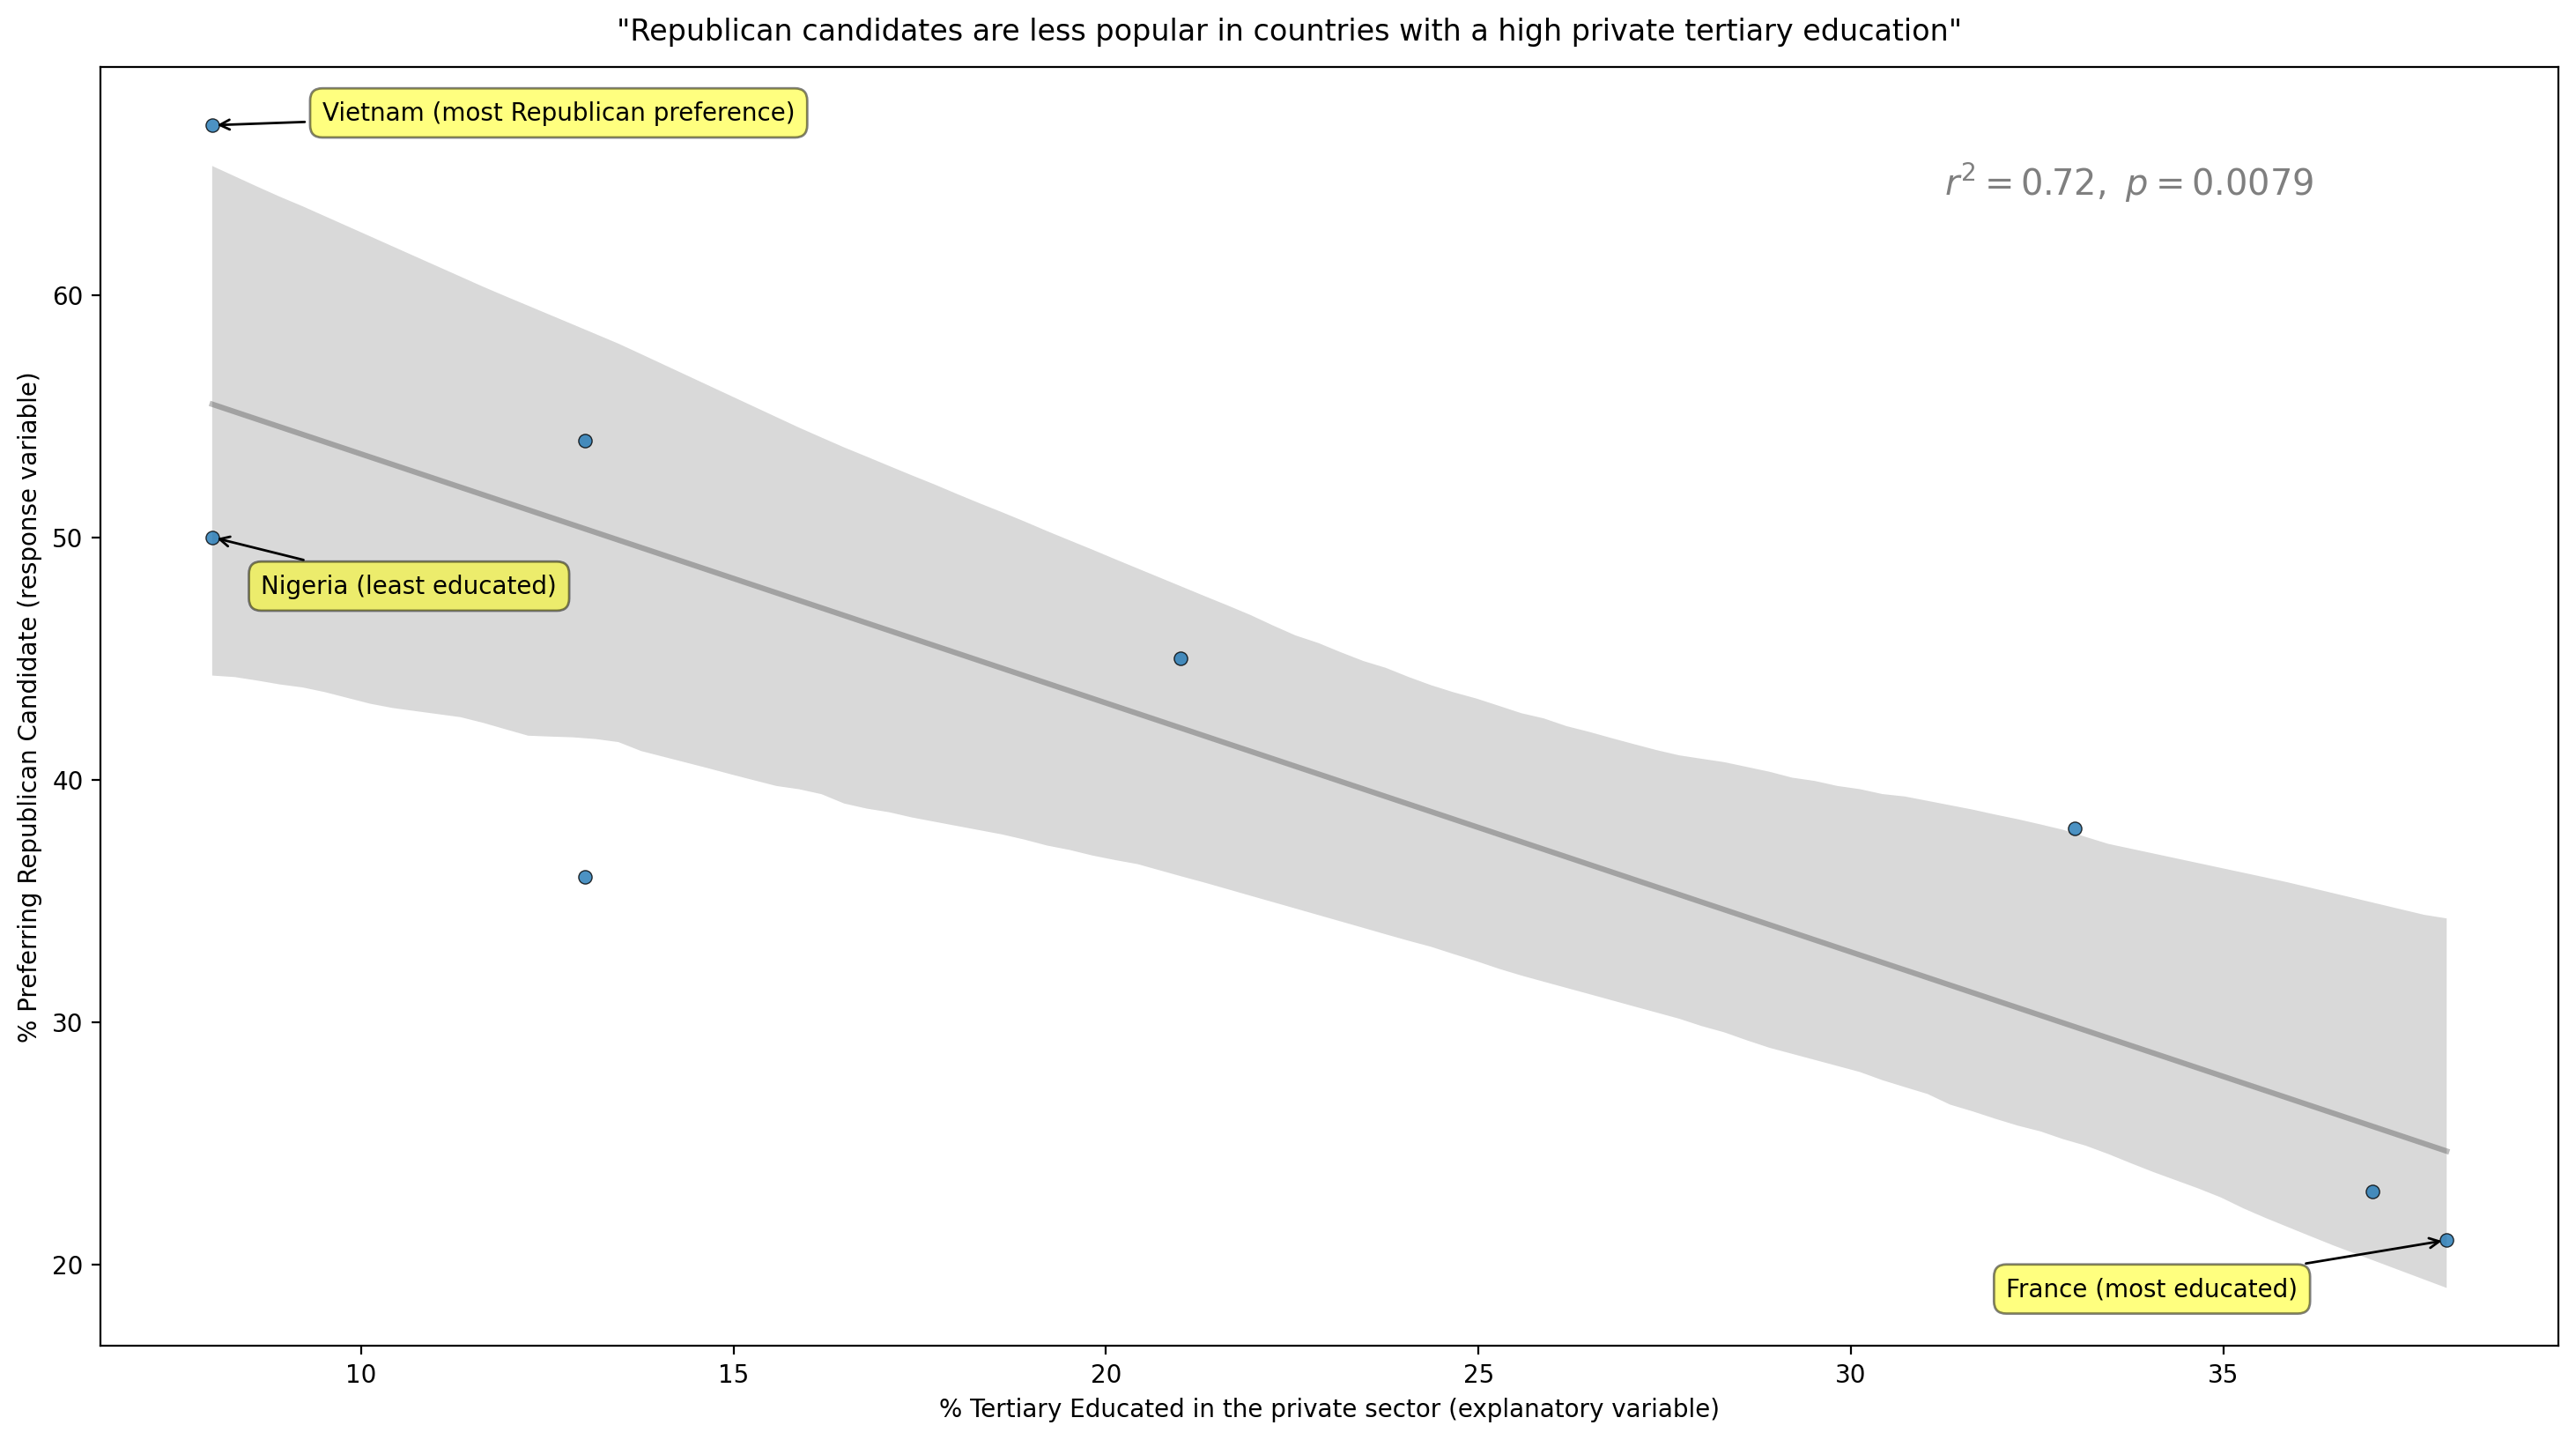

In [71]:

from StatsByCountry.notebook_utils import plt

# Create scatter plot for % tertiary educated (private sector) vs % preferring Republican
df = nu.load_object('Tertiary_education_df')
merged_df = pd.merge(df, poll_df, on='Country')
fig, ax = nu.first_order_linear_scatterplot(
    merged_df.set_index('Country'), 
    xname='tertiary_education_private_sector',
    xlabel_str='% Tertiary Educated in the private sector',
    x_adj='educated',
    yname='percent_preferring_republican',
    ylabel_str='% Preferring Republican Candidate',
    y_adj='Republican preference',
    title='"Republican candidates are less popular in countries with a high private tertiary education"',
    most_x_xytext=(-180, -25),
    least_x_xytext=(20, -25)
)

plt.show()

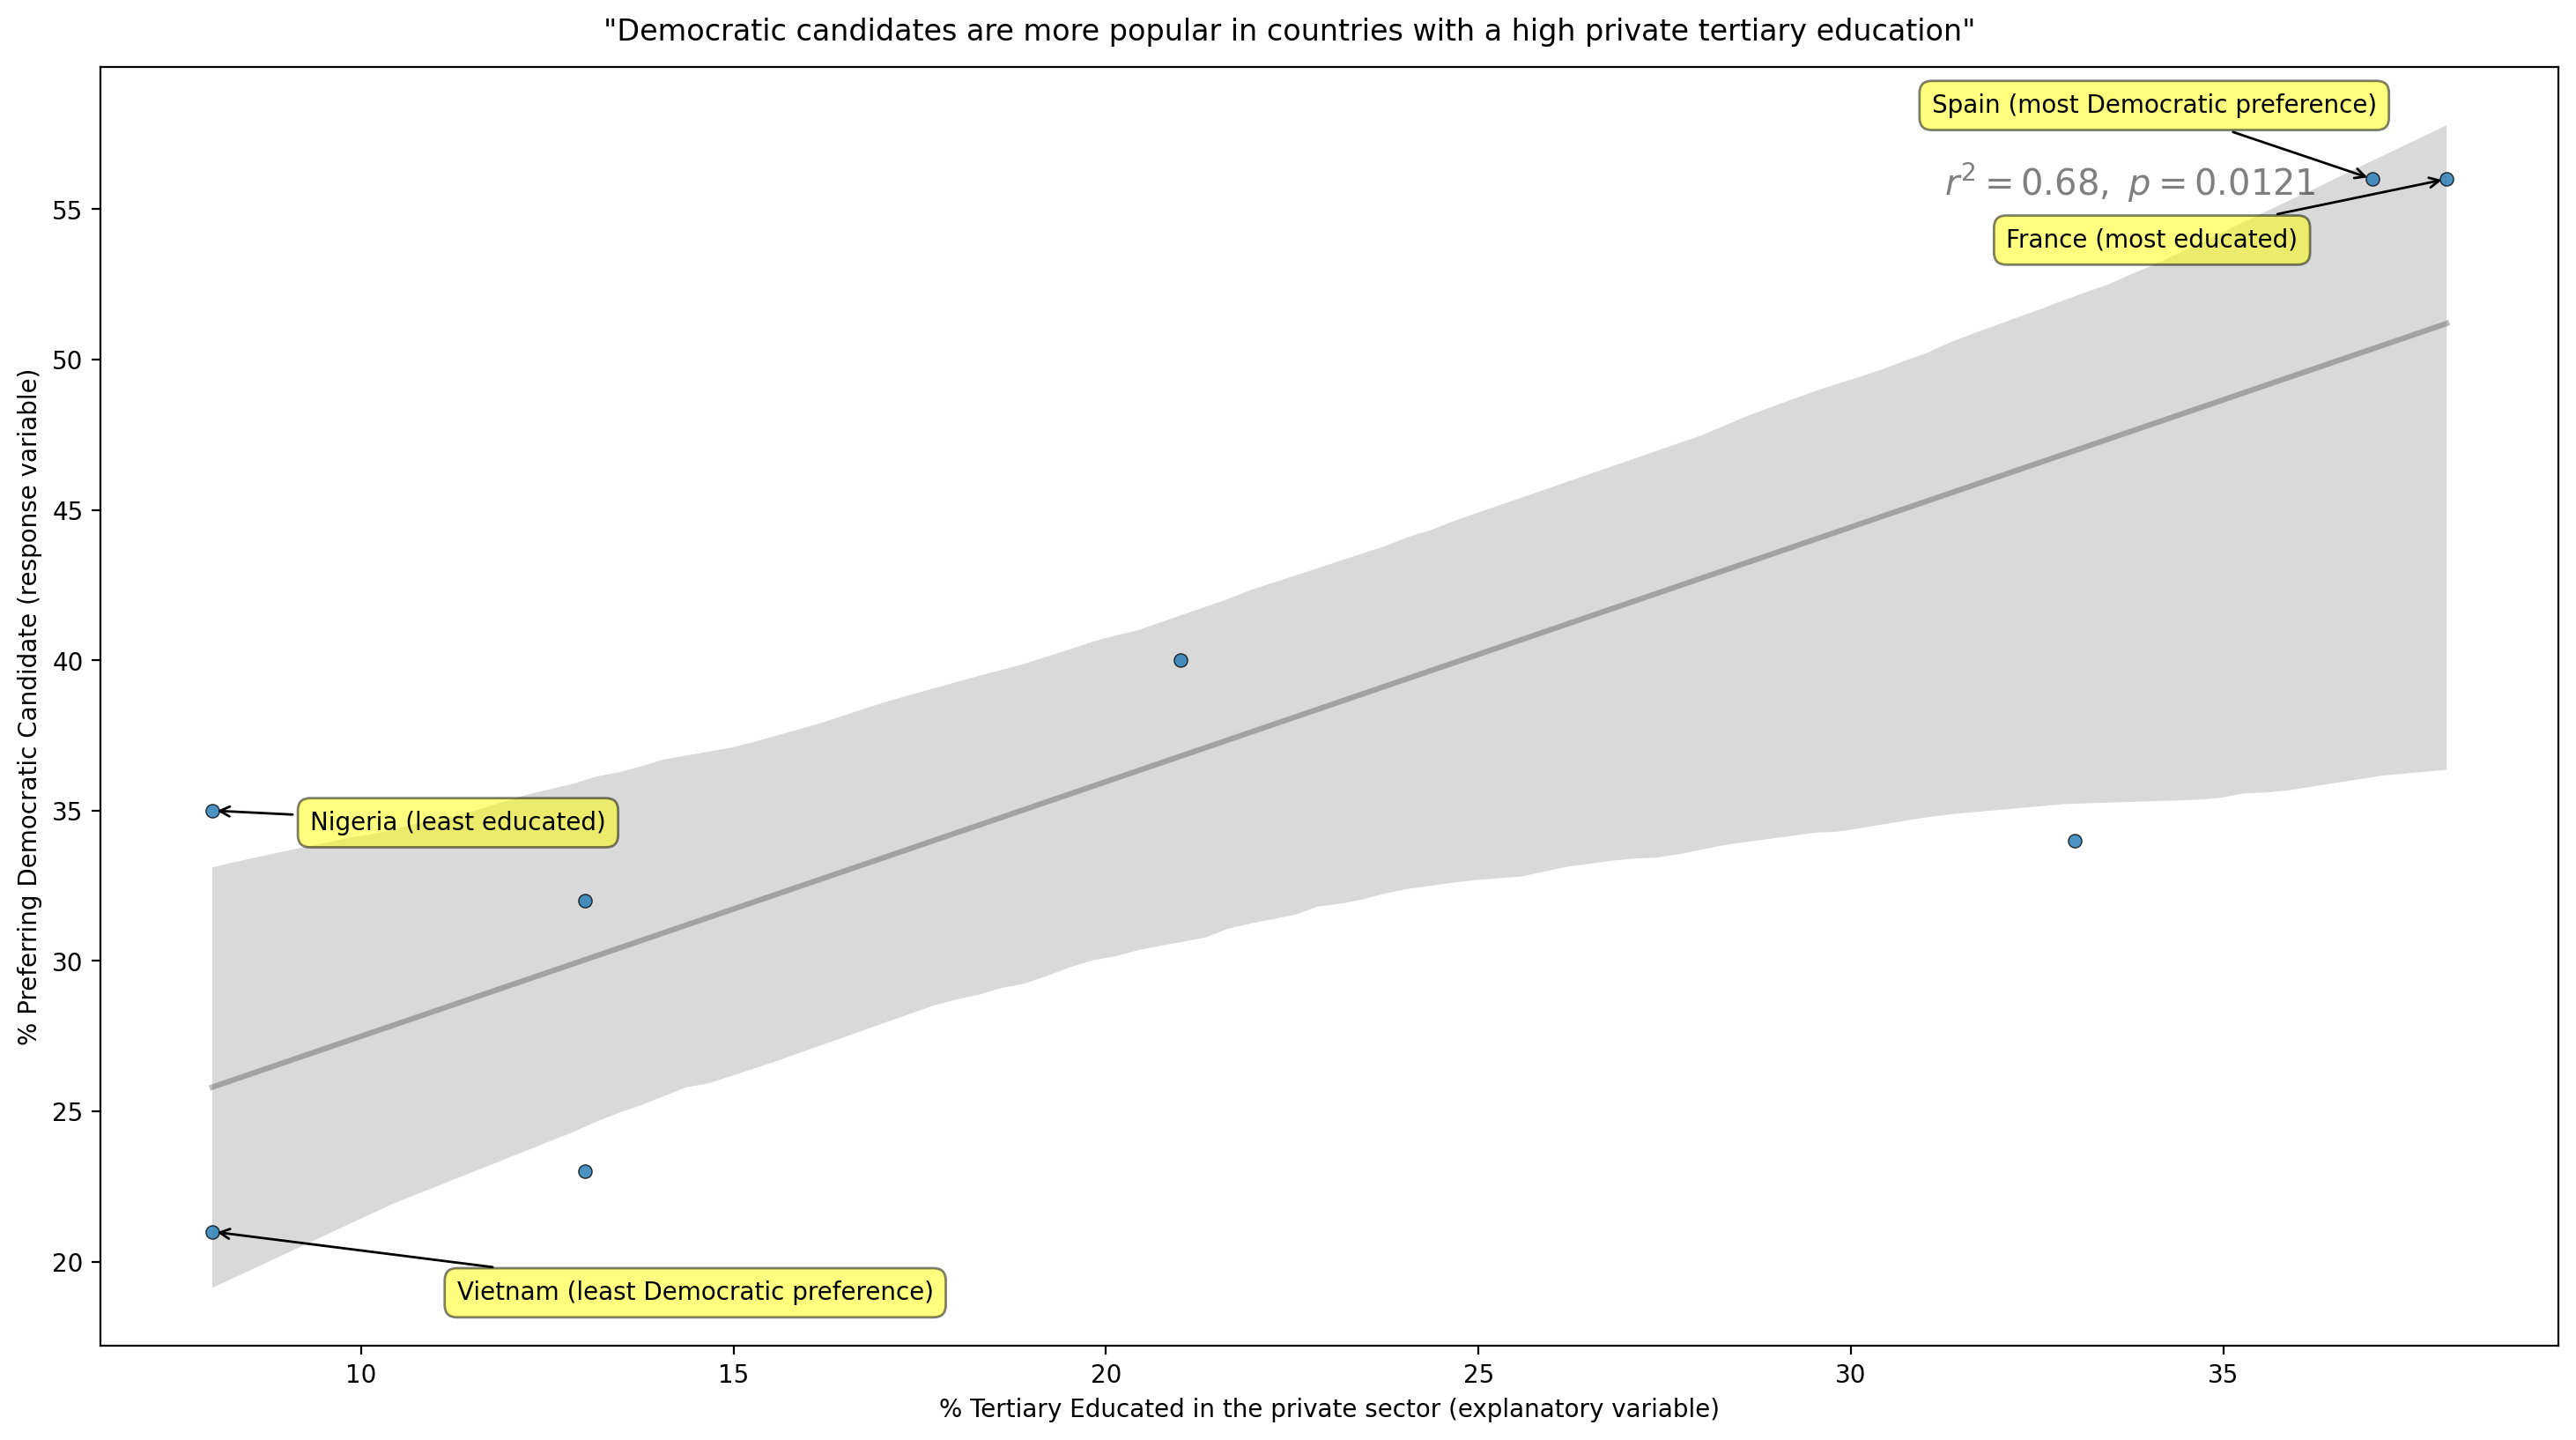

In [79]:

# Create scatter plot for % tertiary educated (private sector) vs % preferring Democratic
df = nu.load_object('Tertiary_education_df')
merged_df = pd.merge(df, poll_df, on='Country')
fig, ax = nu.first_order_linear_scatterplot(
    merged_df.set_index('Country'),
    xname='tertiary_education_private_sector',
    xlabel_str='% Tertiary Educated in the private sector',
    x_adj='educated',
    yname='percent_preferring_democratic',
    ylabel_str='% Preferring Democratic Candidate', 
    y_adj='Democratic preference',
    title='"Democratic candidates are more popular in countries with a high private tertiary education"',
    most_x_xytext=(-180, -30),
    most_y_xytext=(-180, 25),
    least_y_xytext=(100, -30)
)

plt.show()


----

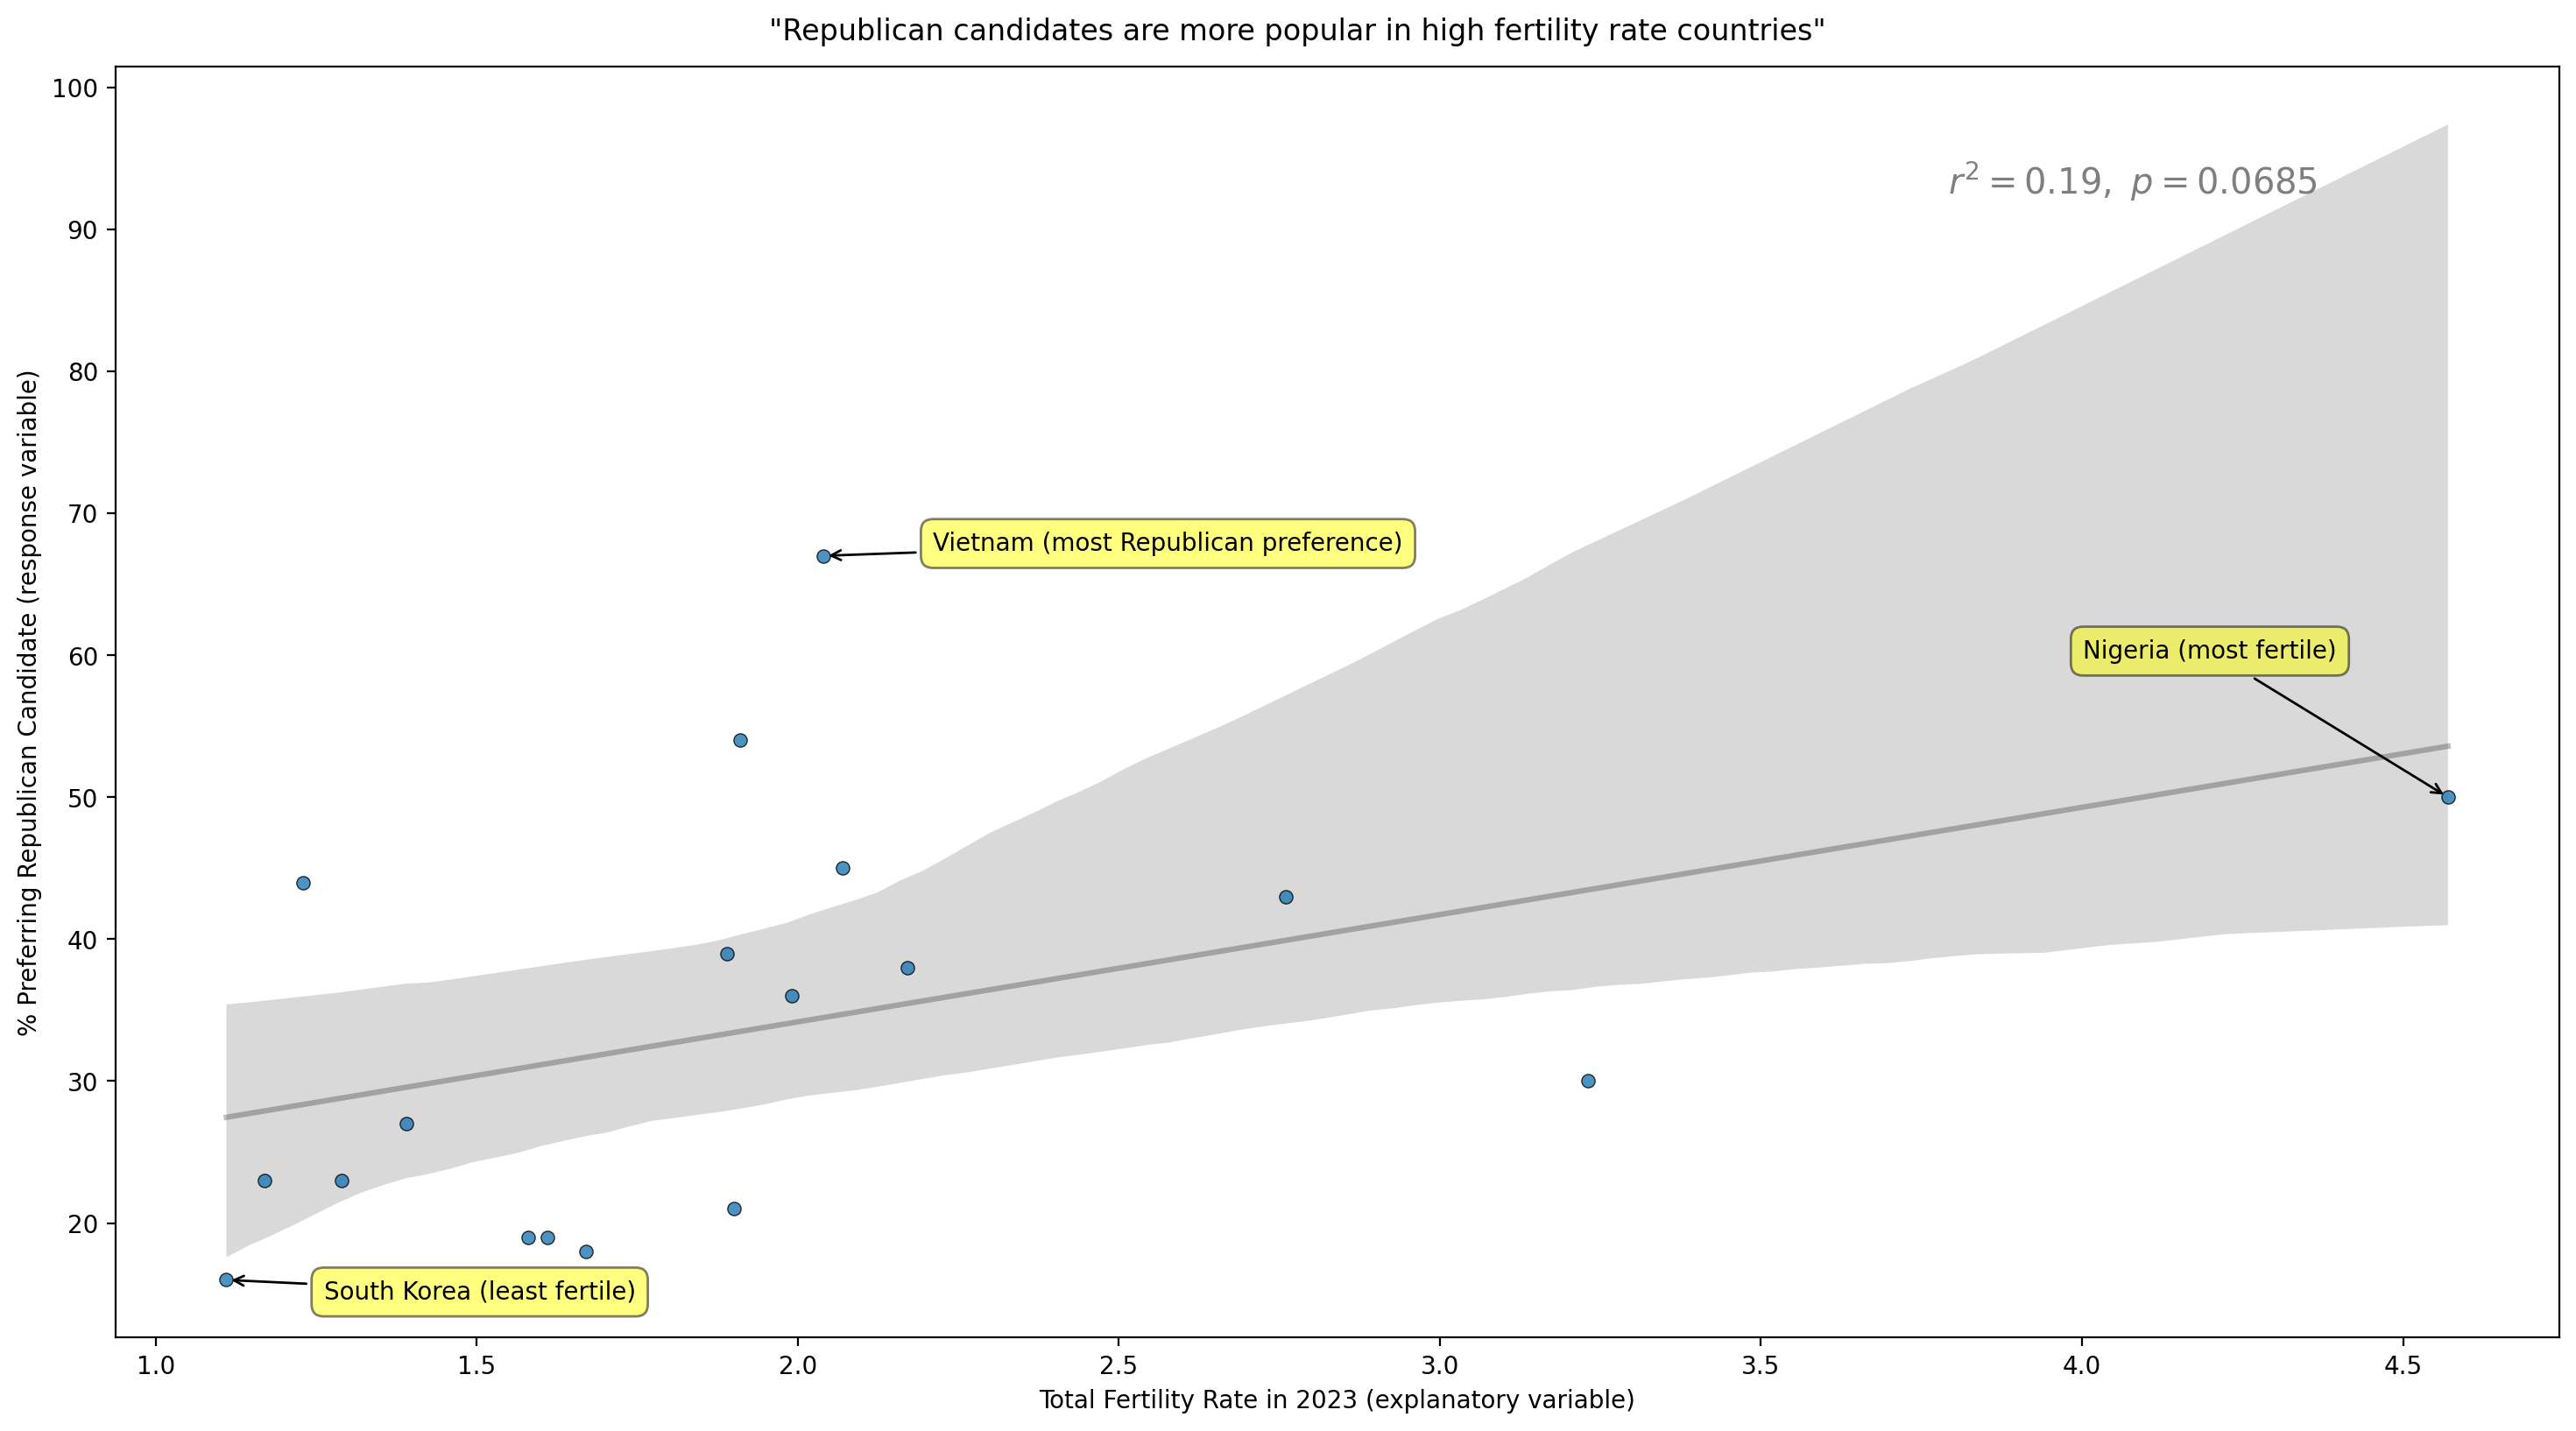

In [13]:

from StatsByCountry.notebook_utils import plt

# Create scatter plot for fertility rate vs % preferring Republican
fig, ax = nu.first_order_linear_scatterplot(
    merged_df.set_index('Country'), 
    xname='totalFertilityRate_fertilityRate2023',
    xlabel_str='Total Fertility Rate in 2023',
    x_adj='fertile',
    yname='percent_preferring_republican',
    ylabel_str='% Preferring Republican Candidate',
    y_adj='Republican preference',
    title='"Republican candidates are more popular in high fertility rate countries"'
)

plt.show()

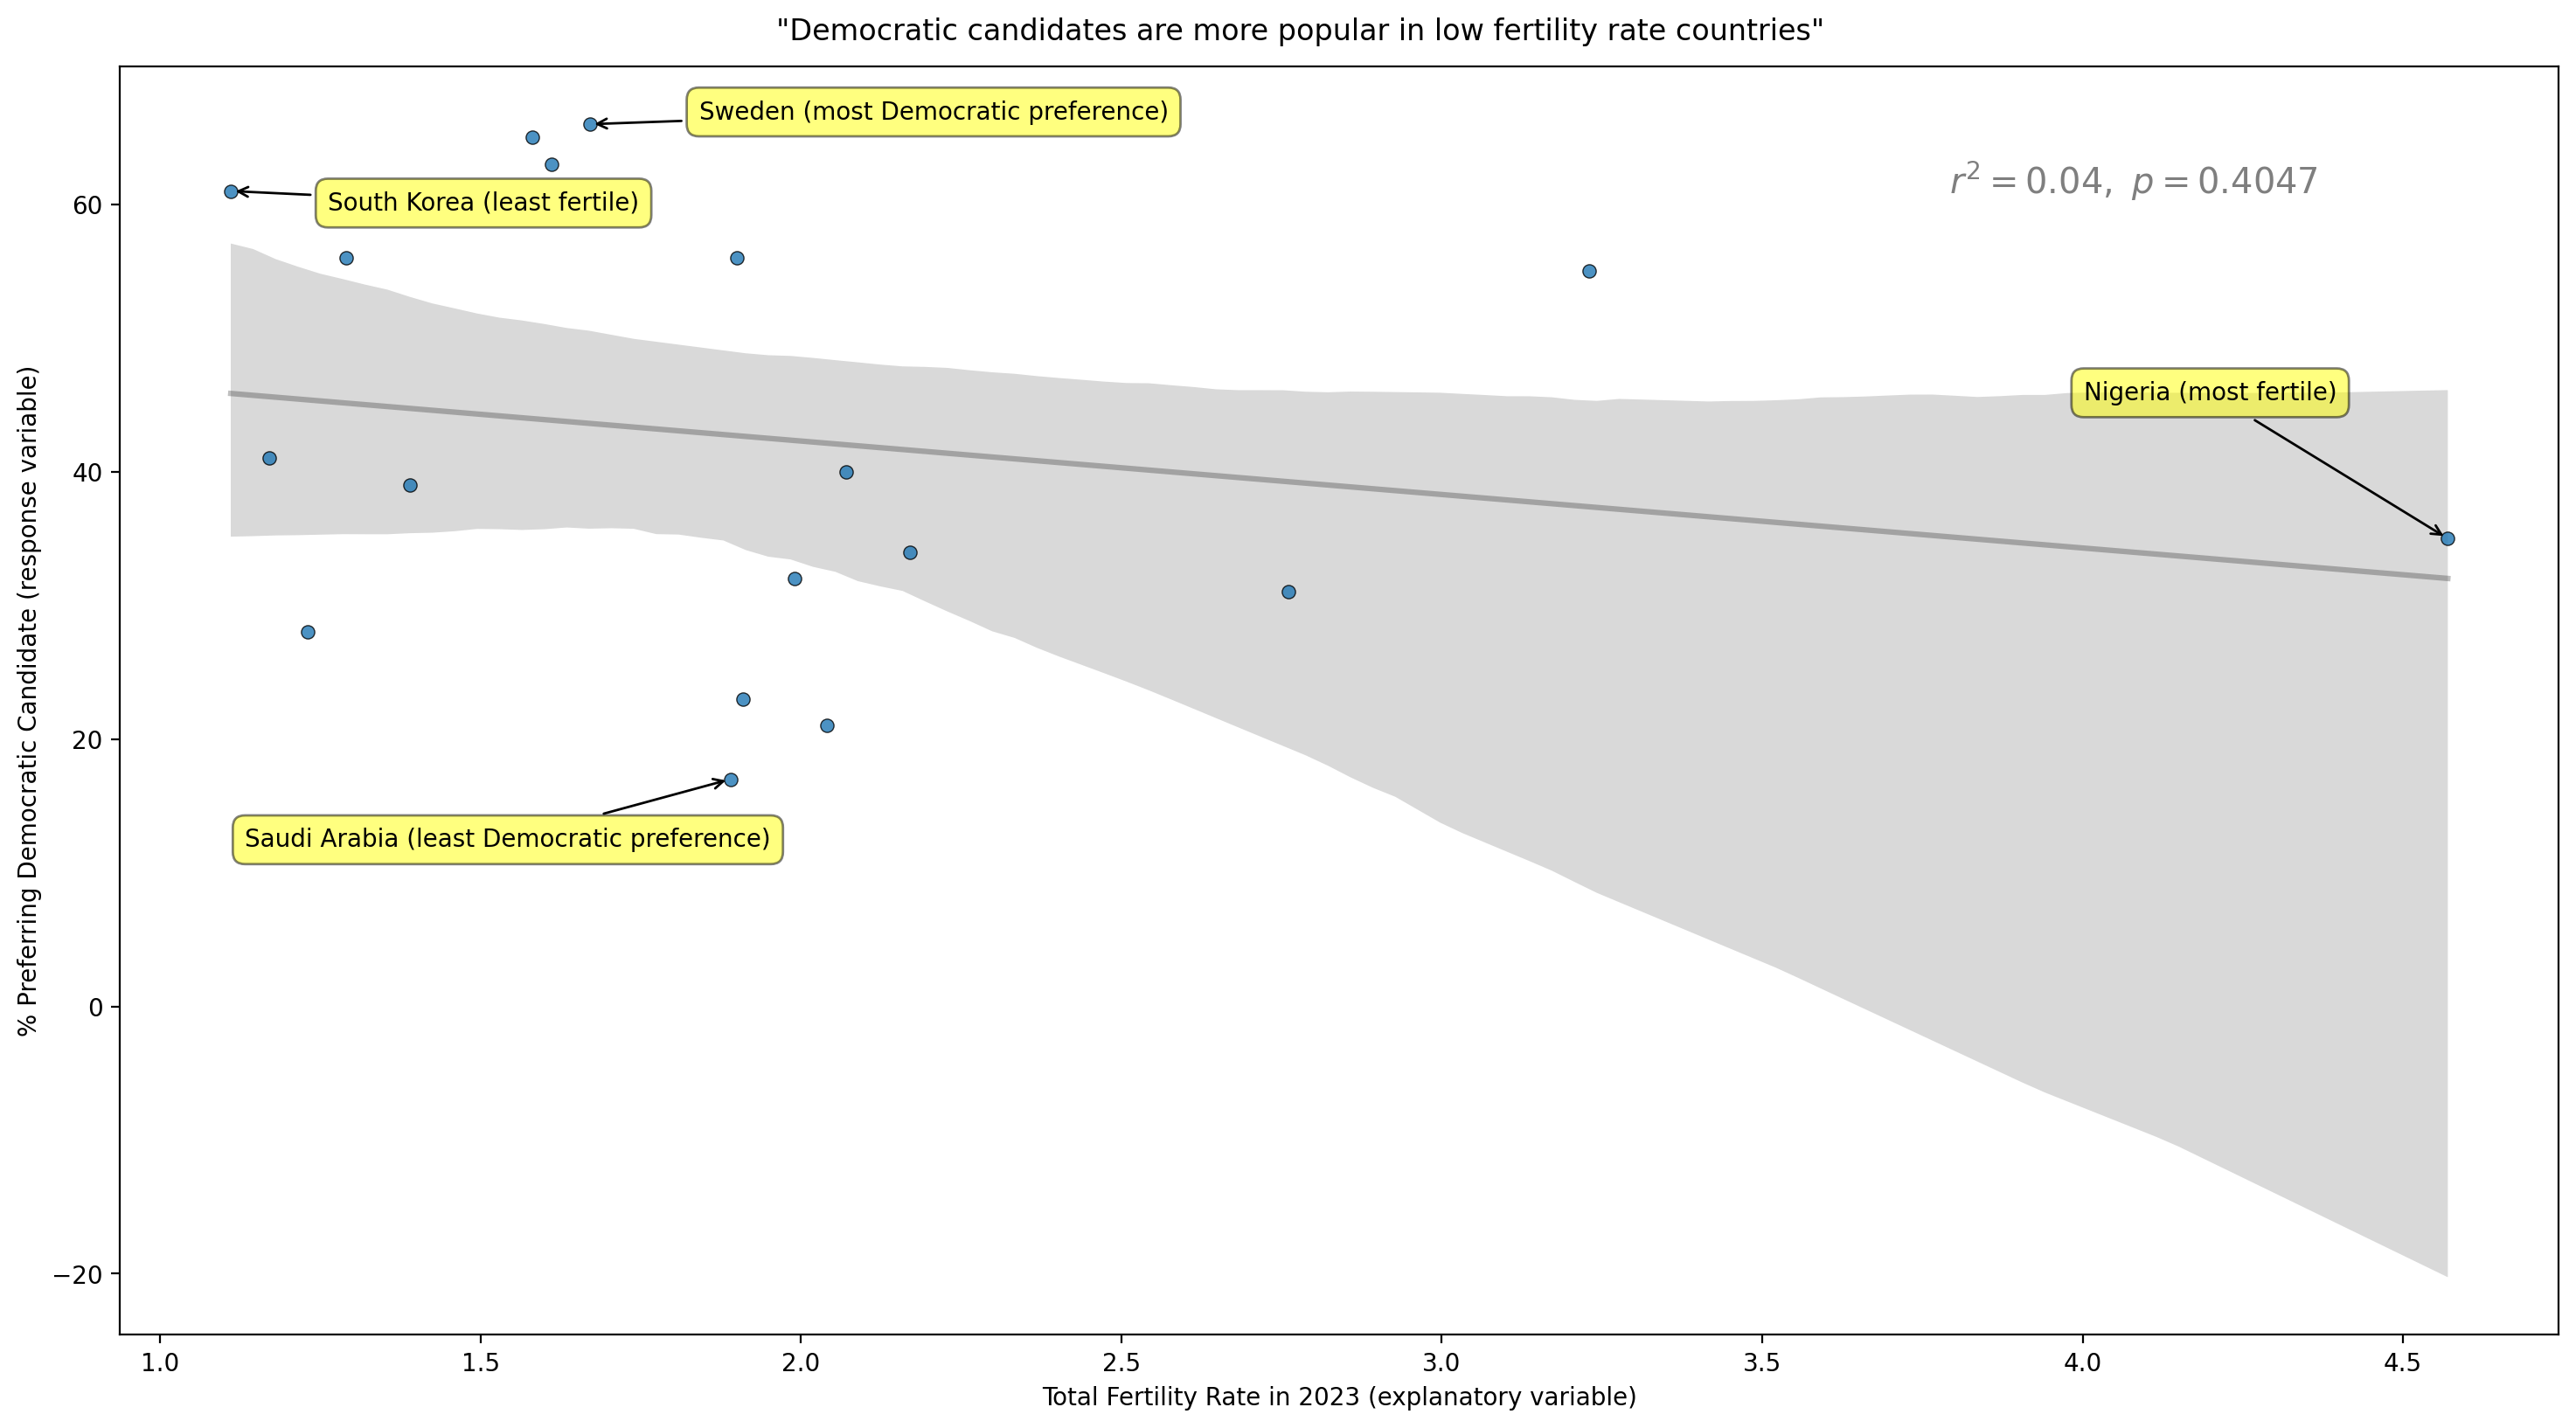

In [12]:

# Create scatter plot for fertility rate vs % preferring Democratic
fig, ax = nu.first_order_linear_scatterplot(
    merged_df.set_index('Country'),
    xname='totalFertilityRate_fertilityRate2023',
    xlabel_str='Total Fertility Rate in 2023',
    x_adj='fertile',
    yname='percent_preferring_democratic',
    ylabel_str='% Preferring Democratic Candidate', 
    y_adj='Democratic preference',
    title='"Democratic candidates are more popular in low fertility rate countries"',
    least_y_xytext=(-200, -30)
)

plt.show()

In [ ]:

# From https://www.worldbank.org/en/data/interactive/2019/05/21/worldwide-bureaucracy-indicators-dashboard#2